In [3]:
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

import network
import numpy as np
from scipy import stats
#from numba import jit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Aufgabe 6
Bestimmung der fraktalen Dimension des perkolierenden Clusters für $p\rightarrow p_c \;,\; p > p_c$.
Das ist die Änderung des Gewichts $P_L(p)$ des perkolierenden Clusters mit linearer Zunahme von $L$.

Es wird für $L$ von 200 bis 5000 mit Abstand von 20 verschiedene Gitter berechnet, wobei für jedes $L$ über 5 Gitter gemittelt wird.

In [24]:
#@jit()
def calc_pl(normalize: bool):
    pc = 0.595
    dL = 20
    L = np.arange(200, 5001, dL)
    pl = np.zeros(L.shape)
    for i in range(L.size):
        pl1 = np.zeros(5)
        for j in range(5):
            n = network.create_percolating(L[i], pc)
            pl1[j] = n.N[n.get_largest_percolating_cluster()]
            if normalize:
                pl1[j] /= n.get_total_occupied_spots()
        pl[i] = np.average(pl1)
    return L, pl, dL       


Berechne zunächst die $P_L$ normiert wie im Blatt beschrieben. Das heißt $P_L$ wird über $L$ aufgetragen.
Die fraktale Dimension ist dann die Ableitung von $P_L$ nach $L$, also die Steigung, falls sich eine Gerade ergibt. 

In [25]:
L, pl, dL = calc_pl(normalize=True)

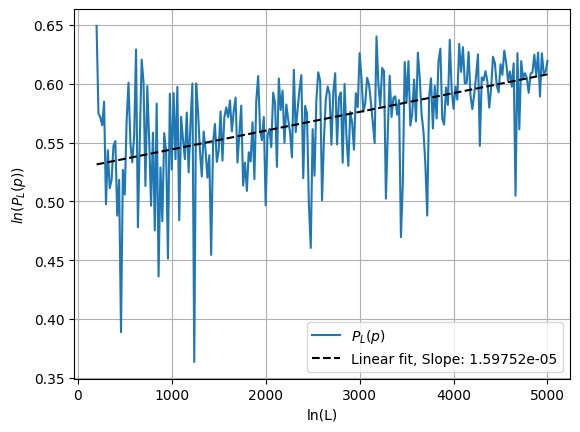

In [26]:
l = stats.linregress(L, pl)
x = np.array([L[0], L[-1]])
fig, ax = plt.subplots()
ax.plot(L, pl, label='$P_L(p)$')
ax.plot(x, x*l.slope + l.intercept, 'k--', label=f'Linear fit, Slope: {round(l.slope, 10)}')
ax.set_xlabel('ln(L)')
ax.set_ylabel('$ln(P_L(p))$')
plt.legend()
plt.grid()

Hier wäre die fraktale Dimension $d_f=1,59\cdot 10^{-5}$. Dies stimmt allerdings nicht mit Literaturwerten überein.
Demnach gilt 
$$P_L\propto L^{d_f} \;\;\; \Leftrightarrow \;\;\; \ln(P_L) \propto d_f\cdot \ln(L) \;.$$ 
Das heißt, es wird doppelt logarithmisch aufgetragen und die steigung durch einen linearen Fit ermittelt.
$P_L$ ist hier allerdings nicht normiert.

In [27]:
L, pl, dL = calc_pl(normalize=False)

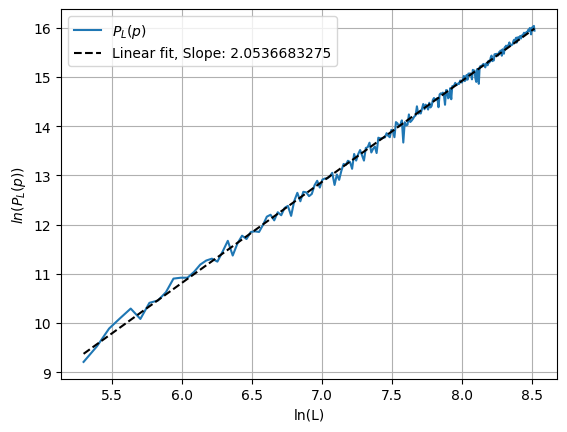

In [29]:
log_L = np.log(L)
log_pl = np.log(pl)
l = stats.linregress(log_L, log_pl)
x = np.array([log_L[0], log_L[-1]])
fig, ax = plt.subplots()
ax.plot(log_L, log_pl, label='$P_L(p)$')
ax.plot(x, x*l.slope + l.intercept, 'k--', label=f'Linear fit, Slope: {round(l.slope, 10)}')
ax.set_xlabel('ln(L)')
ax.set_ylabel('$ln(P_L(p))$')
plt.legend()
plt.grid()

Damit währe die fraktale Dimension $d_f=2,053$